# Seasonality of Winter Precipitation and Groundwater Recharge in the Elwha – Dungeness Watershed, Washington State, United States  

**Report by Megan Verfaillie**

**ESCI 895: Final Project**

**Fall 2021**

## Site Description 

The Elwha - Dungeness watershed (Water Resource Inventory Area (WRIA) 18) is located in Clallam County and Jefferson County in Washington State. Clallam County contains the cities of Sequim and Port Angeles which make up the largest urban areas in the watershed. The area of the subbasin is 807,954 acres and elevations range from 0 to 7788 feet above sea level. The watershed is 25% privately owned and 75% publicly owned and overlaps with Olympic National Park [1]. Olympic National Park was established in 1938 to protect one of the largest areas of old growth forests and temperate rain forests in the lower 48 states [2]. 

The climate in Clallam County, located north of Olympic National Park, is moderate and temperate, with relatively low rainfall in coastal region, an average maximum temperature of 57.7° F and a lowest average temperature of 41.2° F. Greater precipitation occurs in the mountainous regions of Jefferson County [3, 4]. Winter snowfall ranges from 10-30 inches at lower elevations and between 250-500 inches in the mountains [4]. In December 2008 and January 2009, Clallam County experienced flooding and mudslides caused by severe winter storms, record snowfall, additional rainfall, and thawing. N 2015, Clallam County experienced an extreme drought where 100% of the County’s area was in D3 or D4 droughts. Predicted decreases in annual snowpack and increasing instances of prolonged heat will increase the likelihood of future droughts [5]. 

![Figure1](Figure1.png)


## Research Question 
How do precipitation type (as a function of temperature) and snow water equivalent influence downslope groundwater recharge in the Elwha - Dungeness watershed in Washington, U.S.? A qualatative comparison was completed for the following: 

- Year with high SWE
- Year with low SWE 
- Year with more snowfall than rainfall 
- Year with more rainfall than snowfall 

Additional analysis considered the influence of storm precipitation and snowpack melt events in thee mountains on downslope groundwater recharge. 

Climate change is predicted to alter winter precipitation, causing an increase in rainfall and a decrease in snowfall in some areas. Snow stored at high elevations is a valuable water resource during spring melt periods as it runs off into surface water rivers and groundwater. Understanding how the precipitation and snowpack in the mountains influence downslope groundwater recharge is critical for resource planning and predictions of snowmelt flooding. 

The following plots were produced: 

- Plots for data visualization and gap filling 
   - Lat/Lon map of elevation at monitoring stations  
   - Groundwater well depth below land surface over entire study period (2008 -2021) 
- Timeseries of daily snow water equivalent (SWE) at each location (i.e., multiple lines for each year) 
- Timeseries of daily groundwater depth from surface at downslope monitoring well (i.e., multiple lines for each year) 
- Timeseries of SWE for entire sample period (2008 – present) for each location and their average for entire study period 
- Timeseries of maximum, minimum, and average temperature at each location for entire study period 
- Timeseries of rainfall, snowfall, and cumulative precipitation data at each location for entire study period 
- Timeseries of groundwater levels, SWE, snowfall, and rainfall produced for each site over: 
    - Entire period of record 
    - Max / min SWE years 
    - Max / min groundwater level years 
    - Snowfall / rainfall dominated years 
    - Two storm events (one rain dominated and one snowmelt (rapid SWE depletion) dominated) 


## Data Sets 

The Snow Telemetry (SNOTEL) Network is part of the United States Department of Agriculture (USDA) Natural Resources Conservation Service (NRCS) Snow Survey and Water Supply Forecasting (SSWSF) Program for automated snow monitoring. The SNOTEL network is composed of over 900 automated data collection sites located in high-elevation mountain watershed in the western United States. They measure snowpack, precipitation, temperature, and other climatic conditions. A typical site is designed to operate unattended and without maintenance for a year or more and consists of measuring devices and sensors, an equipment shelter for radio telemetry equipment, solar panels, batteries, and a radio antenna. A snow pillow is used to weigh the snow with a pressure transducer to estimate the snow water equivalent, or the amount of water in a given volume of snow [6]. 

There are four SNOTEL sites on the Olympic Peninsula which were installed in 1990, 1999, 2000, and 2008 [7]. Two of these gauges (Waterhole and Dungeness) are located at different elevations (~1000 feet) in the same watershed. These SNOTEL sites include records for snow depth, snow water equivalent (SWE), maximum and minimum air temperature, and precipitation accumulation at hourly intervals in CSV format, with the most recent record starting in 2000. 

The United States Geological Survey (USGS) operates a National Groundwater Monitoring Network (NGWMN) which is a collaboration between state, federal, and local agency data providers to maintain a national network of groundwater wells [8]. USGS currently maintains a single groundwater monitoring well in Sequim, WA (USGS 480546123100901), located downslope of the selected SNOTEL sites. Well monitoring data includes depth to water table as feet below the surface and is available at daily and 15-minute intervals in CSV format from 2018 to present. Prior to 2018, the Washington State Department of Ecology (WAECY) maintained a groundwater monitoring well in the same location which includes daily data in CSV format from 2008 to 2018. 

|Data|Provider|Site Name|Type|Period of Record|Highest Frequency|Format|
| --- | --- | --- | --- | --- | --- | --- |
|SNOTEL|USDA|[Waterhole](https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=974)|Snow depth, SWE, max/min/ temperature, precipitaiton accumulation|1999 - present|Hourly|CSV|
|SNOTEL|USDA|[Dungeness](https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=943)|Snow depth, SWE, max/min/ temperature, precipitaiton accumulation|1998 - present|Hourly|CSV|
|Groundwater Well|USGS|[480546123100901](https://waterdata.usgs.gov/wa/nwis/uv/?site_no=480546123100901&PARAmeter_cd=72019)|Depth to water table (ft)|2018 - present|15 - minute|CSV|
|Groundwater Well|WAECY|[APS724](https://cida.usgs.gov/ngwmn/provider/WAECY/site/100054068/)|Depth to water table (ft)|2008 - 2018|Daily|CSV|


## Site Map --  <font color=red> ADD SCALE BAR </font>
|Site|Latitude|Longitude|
| --- | --- | --- | 
|SNOTEL Waterhole|47 deg; 57 min N|123 deg; 26 min W|
|SNOTEL Dungeness|47 deg; 52 min N|123 deg; 5 min W|
|USGS 480546123100901|48° 05' 46.0" N|123° 10' 08.8" W|
|WAECY APS724|48° 5' 45.9594" N|123° 10' 8.76" W|

![Figure2](Figure2.png)


## Methods 


### Load Libraries and Set Constants 

In [225]:
#%% External libraries

import numpy as np                   # functions for data analysis 
import pandas as pd                  # functions for data frames
from matplotlib import pyplot as plt # functions for plotting
from datetime import datetime        # functions for datetime formatting 
# from IPython.display import display, HTML
# import pprint

fileName0 = 'LatLonElev.csv'
fileName1 = 'Waterhole_Daily_Sensor_Data_Full.txt'
fileName2 = 'Dungeness_Daily_Sensor_Data_Full.txt'
fileName3 = 'WACEY_Water_Level_2007_to_2018.csv'
fileName4 = 'USGS_Well_Depth_2018_to_2021.txt'

# Analysis Period 
startdate = datetime(2008,10,1)
enddate = datetime(2021,9,30)


### Plot Sites by Latitude and Longitude

In [226]:
# Load Data and Convert from ft to meters 
dfsites = pd.read_csv(fileName0, delimiter=",", comment = "#", header=0)
dfsites['Elevation (m)'] = dfsites['Elevation (ft)']*0.3048

print('Success')

Success


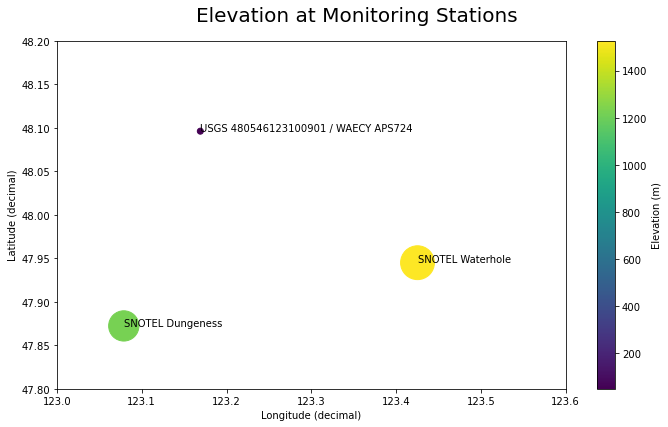

In [227]:
# Plot Data 
fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle('Elevation at Monitoring Stations', fontsize = 20)
sitescatter = ax.scatter(dfsites['Lon'], dfsites['Lat'], c = dfsites['Elevation (m)'], 
                         s = dfsites['Elevation (m)']*0.75, cmap = 'viridis', label = 'Sites')
ax.set_xlim(123, 123.6)
ax.set_xlabel('Longitude (decimal)')
ax.set_ylim(47.8, 48.2)
ax.set_ylabel('Latitude (decimal)')
fig.tight_layout(pad = 1)
# Add colorbar
fig.colorbar(sitescatter, label = 'Elevation (m)')
# Annotate with site names
for i, label in enumerate(dfsites['Site']):
    plt.annotate(label, (dfsites['Lon'][i], dfsites['Lat'][i]))

### Data Download and Organization

Groundwater well data was collected from WAECY and USGS for two consecutive periods of record (2008 – 2018 and 2018 – present). Large periods of missing data were filled via interpolation of surrounding data. USGS data is available at 15-minute intervals and was resampled to hourly average values to match WACEY and SNOTEL data frequencies.

In [228]:
# Load data from Washington State Department of Ecology 
dfwacey = pd.read_csv(fileName3, delimiter=",", comment='#', header=0) 
dfwacey['Time'] = pd.to_datetime(dfwacey['Time'], format = '%Y-%m-%dT%H:%M:00-%S:00')
dfwacey = dfwacey.set_index(['Time'])
datetime_object = datetime.strptime('2007-07-25 12:27:00-08:00', '%Y-%m-%d %H:%M:00-%S:00')
dfwacey = dfwacey[['Depth to Water Below Land Surface in ft.']]
dfwacey = dfwacey.rename(columns={'Depth to Water Below Land Surface in ft.':'Depth to Water Level (ft)'})
dfwacey['Depth to Water Level (m)'] = dfwacey['Depth to Water Level (ft)']*0.3048
dfwacey.index = pd.to_datetime(dfwacey.index).date 
dfwacey.index = pd.to_datetime(dfwacey.index, format = '%Y-%m-%d')
dfwacey = dfwacey.resample('D').mean() 
dfwacey = dfwacey.loc[~dfwacey.index.duplicated(),:]
dfwacey = dfwacey.interpolate(method = 'linear')

# Load data from USGS 
dfusgs = pd.read_csv(fileName4, delimiter="\t", comment='#', header=1, parse_dates=['20d'])
dfusgs = dfusgs.rename(columns={"20d": "Date", '14n': 'Depth to Water Level (ft)'})
dfusgs = dfusgs.set_index(['Date'])
dfusgs = dfusgs.resample('D').mean() 
dfusgs = dfusgs[['Depth to Water Level (ft)']]
dfusgs['Depth to Water Level (m)'] = dfusgs['Depth to Water Level (ft)']*0.3048
dfusgs = dfusgs.interpolate(method = 'linear')

print('Success')

Success


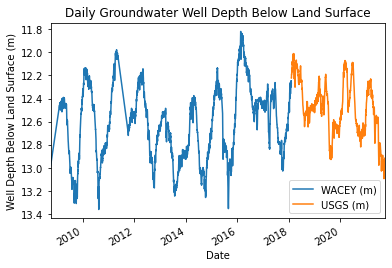

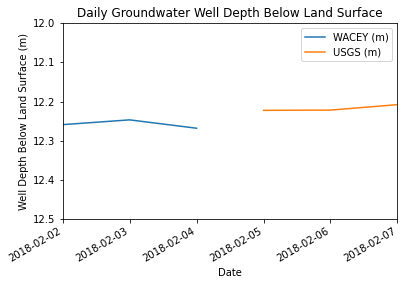

In [229]:
# Visualize datasets 
fig, ax = plt.subplots()
ax.set_title('Daily Groundwater Well Depth Below Land Surface')
ax.set_xlabel('Date')
ax.set_ylabel('Well Depth Below Land Surface (m)')
ax.invert_yaxis()
ax.plot(dfwacey.index, dfwacey['Depth to Water Level (m)'], label = 'WACEY (m)')
ax.plot(dfusgs.index, dfusgs['Depth to Water Level (m)'], label = 'USGS (m)')
ax.legend()
ax.set_xlim(startdate, enddate)
fig.autofmt_xdate()
plt.show()

# Visualize data gap between WACEY and USGS 
def gwgap(df1, df2, df3 = None):
    fig, ax = plt.subplots()
    ax.set_title('Daily Groundwater Well Depth Below Land Surface')
    ax.set_xlabel('Date')
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax.set_ylim(12, 12.5)
    ax.invert_yaxis()
    if df3 is not None: 
        ax.plot(df3.index, df3['Depth to Water Level (m)'], linestyle = '--', label = 'Combined')
    ax.plot(df1.index, df1['Depth to Water Level (m)'], label = 'WACEY (m)')
    ax.plot(df2.index, df2['Depth to Water Level (m)'], label = 'USGS (m)')
    ax.legend()
    ax.set_xlim(datetime(2018,2,2), datetime(2018,2,7))
    fig.autofmt_xdate()
    plt.show()

gwgap(dfwacey, dfusgs)

The USGS and WACEY sites were located in the same location, therefore the USGS data for date and depth to water table was appended to the WACEY data to create an extended period of record (2008 – present). No overlapping dates were present in original datasets. 

Success


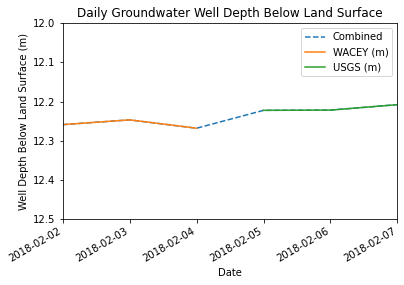

In [230]:
# Join WACEY and USGS data and remove overlaps
dfwell = pd.concat([dfwacey, dfusgs], join = 'outer') 
dfwell.index = pd.to_datetime(dfwell.index).date 
dfwell.index = pd.to_datetime(dfwell.index, format = '%Y-%m-%d')

print('Success')

# Visualize filled data gap 
def gwgap(df1, df2, df3 = None):
    fig, ax = plt.subplots()
    ax.set_title('Daily Groundwater Well Depth Below Land Surface')
    ax.set_xlabel('Date')
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax.set_ylim(12, 12.5)
    ax.invert_yaxis()
    if df3 is not None: 
        ax.plot(df3.index, df3['Depth to Water Level (m)'], linestyle = '--', label = 'Combined')
    ax.plot(df1.index, df1['Depth to Water Level (m)'], label = 'WACEY (m)')
    ax.plot(df2.index, df2['Depth to Water Level (m)'], label = 'USGS (m)')
    ax.legend()
    ax.set_xlim(datetime(2018,2,2), datetime(2018,2,7))
    fig.autofmt_xdate()
    plt.show()

gwgap(dfwacey, dfusgs, dfwell)

SNOTEL data for snow depth, SWE, temperature, and precipitation accumulation was collected from USDA for the Waterhole and Dungeness sites in CSV format. Dates prior to 2008 were removed from the dataset to match the period of record for the groundwater samples. Short periods of missing data 
(< 1 day) were filled via interpolation of surrounding data. 

In [231]:
# Function for loading SNOTEL data, filling gaps by linear interpolation, and converting to metric 
def loadSNOTEL(fileName): 

    df = pd.read_csv(fileName, delimiter=",", comment='#', header=0, parse_dates=['Date'])
    df = df.set_index(['Date'])
    df = df[['Snow Water Equivalent (in) Start of Day Values', 'Air Temperature Minimum (degF)', 
                              'Air Temperature Maximum (degF)', 'Air Temperature Average (degF)', 
                              'Precipitation Increment (in)', 'Precipitation Accumulation (in) Start of Day Values']]
    #df.interpolate(method = 'linear', inplace = True)
    
    # Convert SWE to meters 
    df['Snow Water Equivalent (m)'] = df['Snow Water Equivalent (in) Start of Day Values']*0.0254
    
    # Convert temperatures to degrees C 
    df['Air Temperature Minimum (degC)'] = (df['Air Temperature Minimum (degF)'] - 32) / 1.8
    df['Air Temperature Maximum (degC)'] = (df['Air Temperature Maximum (degF)'] - 32) / 1.8
    df['Air Temperature Average (degC)'] = (df['Air Temperature Average (degF)'] - 32) / 1.8
    
    # For plotting zero degrees C 
    df['Zero'] = 0
    
    # Convert precipitation to cm 
    df['Precipitation Increment (cm)'] = df['Precipitation Increment (in)']*2.54
    df['Precipitation Accumulation (cm)'] = df['Precipitation Accumulation (in) Start of Day Values']*2.54
    
    return df

# Run Function for Waterhole and Dungeness 
dfwaterhole = loadSNOTEL(fileName1)
dfdungeness = loadSNOTEL(fileName2)

print('Success')

Success


A mask was applied to separate precipitation increment data into snowfall and rainfall. Precipitation that corresponded with temperatures less than 0 °C was identified and extracted to create a list of hourly snowfall. Precipitation that corresponded with temperatures greater than 0 °C was identified and extracted to create a list of hourly rainfall. 

In [232]:
# Function to separate SNOTEL precipitation increment into snowfall and rainfall based on average temperature 
# Snow occurs at temps <= 0 degrees C, rain occurs at temps > 0 degrees C 
def snowrain(df): 
    df['Snowfall'] = df['Precipitation Increment (cm)'][df['Air Temperature Average (degC)'] <= 0]
    df['Snowfall'].fillna(0, inplace = True)
    
    df['Rainfall'] = df['Precipitation Increment (cm)'][df['Air Temperature Average (degC)'] > 0]
    df['Rainfall'].fillna(0, inplace = True)
    
    return df

# Run function for Waterhole and Dungeness 
dfwaterhole = snowrain(dfwaterhole)
dfdungeness = snowrain(dfdungeness)

print('Success')

Success


## <font color=red>SECTION STILL IN PROGRESS -- SNOW/RAIN FRACTION CALCS NOT COMPLETED FOR WATER YEARS YET </font>

The sum of annual precipitation, rainfall, and snowfall was calculated to identify overall trends from year to year. 

In [233]:
def preciptypes(df):  
    dfprecip = df[['Precipitation Increment (cm)']].resample('Y').sum()
    dfprecip['Rainfall'] = df['Rainfall'].resample('Y').sum()
    dfprecip['Snowfall'] = df['Snowfall'].resample('Y').sum()
    dfprecip['Snow/Rain Fraction'] = dfprecip['Snowfall']/dfprecip['Rainfall']
    return dfprecip

print('Success')

dfprecipw = preciptypes(dfwaterhole) 
dfprecipd = preciptypes(dfdungeness)
# display(dfprecipw)
# display(dfprecipd)

def preciptypesWY(df1, precip_type): 
    dates = {'wy_start': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 
             'wy_end': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
    wy_end = pd.DataFrame(data = dates)
    yearlyp = [] 
    # Create for loop to calculate yearly precipitation 
    for i, v in wy_end.iterrows(): 
        #print(v[0])
        #print(round(df1.loc[datetime(v[0],10,1):datetime(v[1],9,30), precip_type].sum(), 2))
        yearlyp.append(round(df1.loc[datetime(v[0],10,1):datetime(v[1],9,30), precip_type].sum(),3))
    
    return yearlyp

yearlyp = preciptypesWY(dfwaterhole, 'Rainfall')
# print(yearlyp)
print('Section in Progress -- INCOMPLETE')

Success
Section in Progress -- INCOMPLETE


### Creation of Plots
Two timeseries of SWE were created for the Waterhole and Dungeness sites. Each plot includes separate lines for each year to visualize seasonal and annual changes in SWE. The mean for each day was also calculated and added to the plot. A similar plot was created as part of the analysis in Stamper, 2018 [9]. A third timeseries was created to show the full record (2008 – present) from each site and their average, combined SWE on each date to demonstrate patterns of SWE for the entire sample region. 

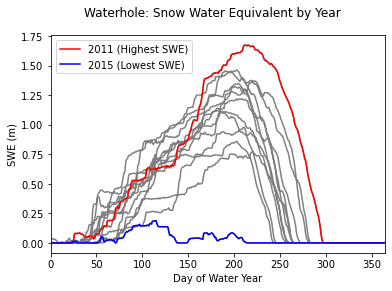

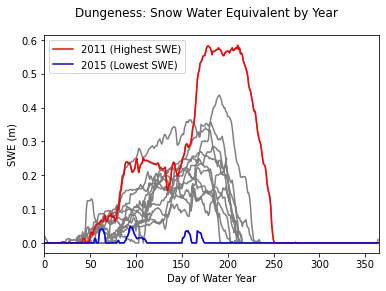

In [234]:
# Function for plotting SWE for each individual year on a single plot 
def yearlySWE(df, site, start_date, end_date): 
    # Calculate day of water year 
    df_year = df.copy()
    df_year['Measurement Day'] = df_year.index.dayofyear+92
    df_year['Day of Water Year'] = (df_year['Measurement Day']-365)[df_year['Measurement Day'] >= 366]
    df_year['Day of Water Year'] = df_year['Day of Water Year'].fillna(df_year['Measurement Day'] )

    # Trim dates 
    df_year = df_year[start_date:end_date]

    # Insert NaN values at end of each dataframe by replacing final date 
    # Create df of years to iterate
    dates = {'wy_end': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
    wy_end = pd.DataFrame(data = dates)
    # Create for loop to assign NaN values 
    for i, v in wy_end.iterrows(): 
        df_year.loc[datetime(v[0],9,30), 'Day of Water Year'] = np.nan 

    # Identify data for most recent year 
    df_max = df_year[datetime(2010,10,1):datetime(2011,9,30)]
    #df_max = df_year[datetime(2011,10,1):datetime(2012,9,30)]
    df_min = df_year[datetime(2014,10,1):datetime(2015,9,30)]

    # Plot Individual Years and Highlight Recent Year 
    fig, ax = plt.subplots()
    fig.suptitle(site + ': Snow Water Equivalent by Year')
    ax.plot(df_year['Day of Water Year'], df_year['Snow Water Equivalent (m)'], color = 'gray')
    ax.plot(df_max['Day of Water Year'], df_max['Snow Water Equivalent (m)'], color = 'red', label = '2011 (Highest SWE)')
    ax.plot(df_min['Day of Water Year'], df_min['Snow Water Equivalent (m)'], color = 'blue', label = '2015 (Lowest SWE)')

    ax.set_xlim(0, 365)
    ax.set_xlabel('Day of Water Year')
    ax.set_ylabel('SWE (m)')
    ax.legend()

# Run function for Waterhole and Dungeness 
yearlySWE(dfwaterhole, 'Waterhole', startdate, enddate)
yearlySWE(dfdungeness, 'Dungeness', startdate, enddate)


Note: No clear minimum trendline was present so the year with the greatest depth to water level in the winter was selected


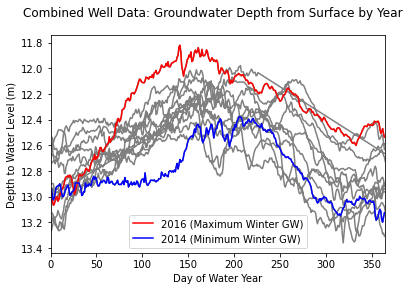

In [235]:
startdate = datetime(2008, 10, 1)
def yearlyGW(df, site, start_date, end_date): 
    # Calculate day of water year 
    df_year = dfwell.copy()
    df_year = df_year.loc[~df_year.index.duplicated(),:]
    df_year['Measurement Day'] = df_year.index.dayofyear+92
    df_year['Day of Water Year'] = (df_year['Measurement Day']-365)[df_year['Measurement Day'] >= 366]
    df_year['Day of Water Year'] = df_year['Day of Water Year'].fillna(df_year['Measurement Day'])
    
    # Trim dates 
    df_year = df_year[start_date:end_date]

    # Insert NaN values at end of each dataframe by replacing final date 
    # Create df of years to iterate
    dates = {'wy_end': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
    wy_end = pd.DataFrame(data = dates)
    # Create for loop to assign NaN values 
    for i, v in wy_end.iterrows(): 
        df_year.loc[datetime(v[0],9,30), 'Day of Water Year'] = np.nan 

    # Identify data for most recent year 
    df_min = df_year[datetime(2015,10,1):datetime(2016,9,30)]
    df_max = df_year[datetime(2013,10,1):datetime(2014,9,30)]

    # Plot Individual Years and Highlight Recent Year 
    fig, ax = plt.subplots()
    fig.suptitle(site + ': Groundwater Depth from Surface by Year')
    ax.plot(df_year['Day of Water Year'], df_year['Depth to Water Level (m)'], color = 'gray')
    ax.plot(df_min['Day of Water Year'], df_min['Depth to Water Level (m)'], color = 'red', label = '2016 (Maximum Winter GW)')
    ax.plot(df_max['Day of Water Year'], df_max['Depth to Water Level (m)'], color = 'blue', label = '2014 (Minimum Winter GW)')
    ax.set_xlim(0, 365)
    ax.set_xlabel('Day of Water Year')
    ax.set_ylabel('Depth to Water Level (m)')
    ax.invert_yaxis()
    ax.legend()
    
yearlyGW(dfwell, 'Combined Well Data', startdate, enddate)
print('Note: No clear minimum trendline was present so the year with the greatest depth to water level in the winter was selected')

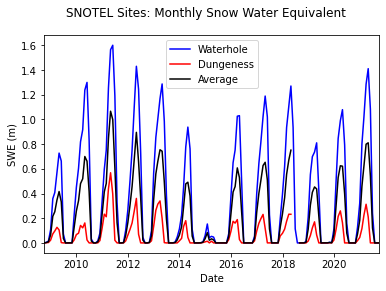

In [236]:
# Full period of interest for SWE at each SNOTEL site and their average 
fig, ax = plt.subplots()
fig.suptitle('SNOTEL Sites: Monthly Snow Water Equivalent')

ax.plot(dfwaterhole['Snow Water Equivalent (m)'].resample('M').mean(), color = 'blue', label = 'Waterhole')
ax.plot(dfdungeness['Snow Water Equivalent (m)'].resample('M').mean(), color = 'red', label = 'Dungeness')
ax.plot((dfwaterhole['Snow Water Equivalent (m)'].resample('M').mean() + 
         dfdungeness['Snow Water Equivalent (m)'].resample('M').mean())/2, 
        color = 'k', label = 'Average')
ax.set_xlim(startdate, enddate)
ax.set_xlabel('Date')
ax.set_ylabel('SWE (m)')
ax.legend()

A timeseries of maximum, minimum, and average temperatures were also created for each SNOTEL site showing the trend over time. A similar plot was created as part of the analysis in Stamper, 2018. In this analysis, temperature was used to identify precipitation type and, therefore, an overall increase or decrease in average temperature will significantly influence the results. 

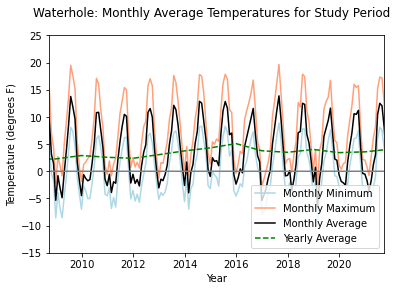

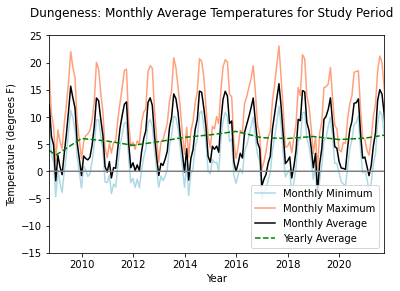

In [237]:
# Function for plotting min, max, and average monthly temperature for each site 
def plottemp(df, site, start_date, end_date):
    fig, ax = plt.subplots() #figsize = (9,6)
    ax.plot(df['Air Temperature Minimum (degC)'].resample('M').mean(), color = 'lightblue', label = 'Monthly Minimum')
    ax.plot(df['Air Temperature Maximum (degC)'].resample('M').mean(), color = 'lightsalmon', label = 'Monthly Maximum')
    ax.plot(df['Air Temperature Average (degC)'].resample('M').mean(), color = 'k', label = 'Monthly Average')
    ax.plot(df[['Air Temperature Average (degC)']].resample('Y').mean(), color = 'green', linestyle = '--', label = 'Yearly Average')
    ax.plot(df['Zero'], color = 'gray')
    
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-15, 25)
    fig.suptitle(site + ': Monthly Average Temperatures for Study Period')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (degrees F)')
    ax.legend(loc = 'lower right')
    
# Run function for Waterhole and Dungeness 
plottemp(dfwaterhole, 'Waterhole', startdate, enddate)
plottemp(dfdungeness, 'Dungeness', startdate, enddate)


A timeseries plot of rainfall, snowfall, temperature, and cumulative precipitation was created for each SNOTEL site to demonstrate water input into the mountainous region near Sequim, WA. A line was drawn at 0 °C to illustrate the freezing point of water. A similar plot was created as part of the analysis in Stamper, 2018. 

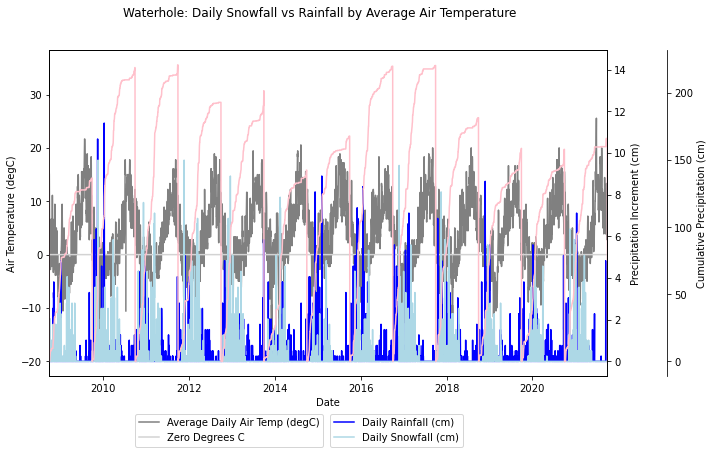

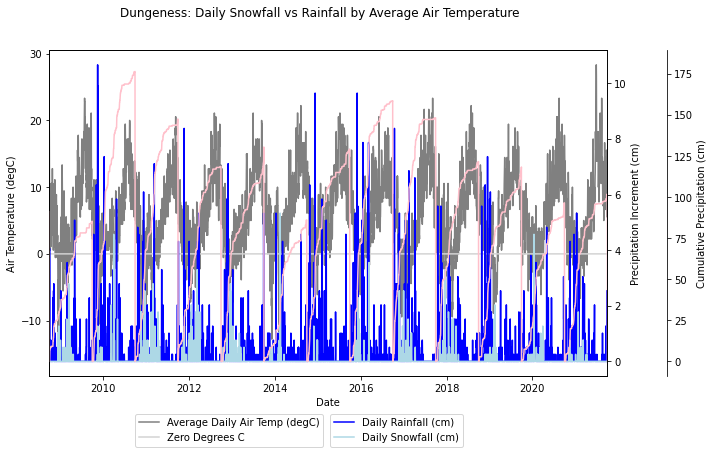

In [238]:
# Function for plotting daily precipitation data vs daily average temperature 
def plotprecip(df, site, start_date, end_date):
    fig, ax1 = plt.subplots(figsize = (10,6))
    ax1.set_xlabel('Date')
    ax1.set_xlim(start_date, end_date)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax1.set_ylabel('Air Temperature (degC)')
    ax2.set_ylabel('Precipitation Increment (cm)')
    ax3.set_ylabel('Cumulative Precipitation (cm)')
    ax3.spines['right'].set_position(('outward', 60))
    
    ax3.plot(df['Precipitation Accumulation (cm)'], color = 'pink', label = 'Precipitation Accumulation')

    ax1.plot(df['Air Temperature Average (degC)'], color = 'gray', label = 'Average Daily Air Temp (degC)')
    ax1.plot(df['Zero'], color = 'lightgray', label = 'Zero Degrees C')
        
    ax2.plot(df['Rainfall'], color = 'blue', label = 'Daily Rainfall (cm)')
    ax2.plot(df['Snowfall'], color = 'lightblue', label = 'Daily Snowfall (cm)')
    
    
    fig.suptitle(site + ': Daily Snowfall vs Rainfall by Average Air Temperature')
    ax1.legend(bbox_to_anchor = (0.5,-0.1))
    ax2.legend(bbox_to_anchor = (0.75,-0.1))

# Run function for Waterhole and Dungeness 
plotprecip(dfwaterhole, 'Waterhole', startdate, enddate)
plotprecip(dfdungeness, 'Dungeness', startdate, enddate)


Groundwater levels extracted from the combined dataset were plotted for the period of record. Snowfall and rainfall at the SNOTEL sites were added to the plot to identify correlation between precipitation in the mountainous region south of Sequim, WA and the groundwater levels near the coast. Several conditions were explored including: maximum and minimum SWE years, maximum and minimum well level depths, and years with varying ratios of snowfall and rainfall (IN PROGRESS). 

Full Period of Interest (2009 - 2021 WY)


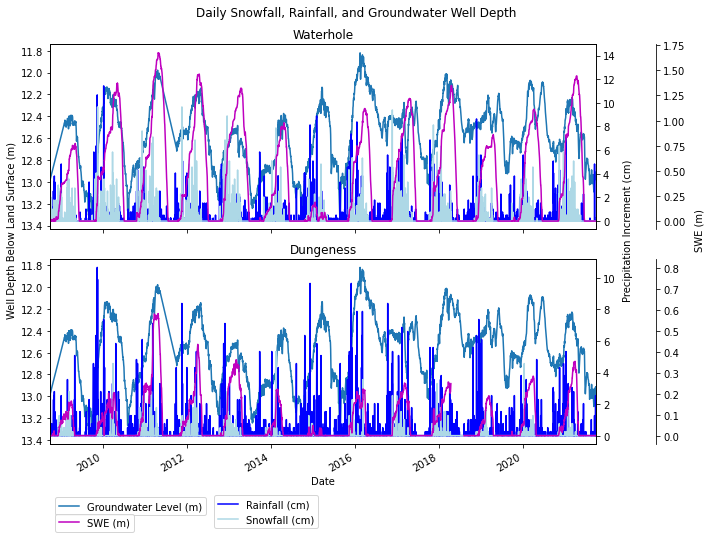

Year with Max SWE was Missing Significant Portion of Well Data so Year with 2nd Highest SWE was chosen (2012 WY)


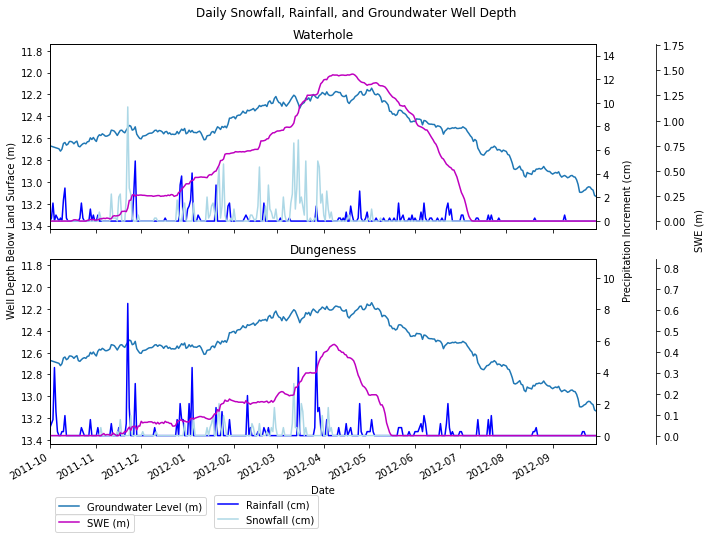

Year with Min SWE (2015 WY)


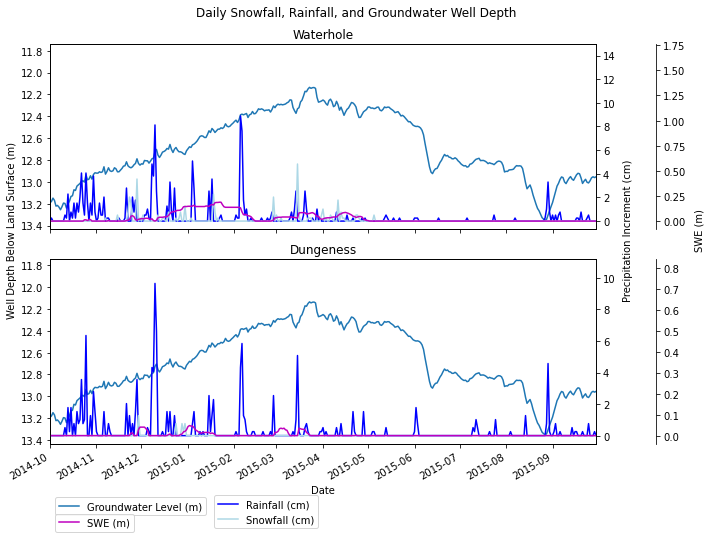

Year with Shallowest Well Depth from Surface (Greatest Depth) (2016 WY)


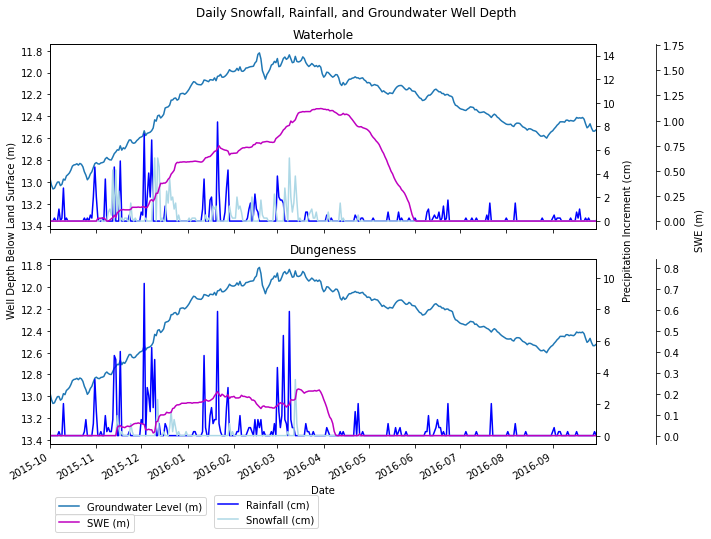

Year with Deepest Well Depth from Surface (Shallowest Depth) (2016 WY)


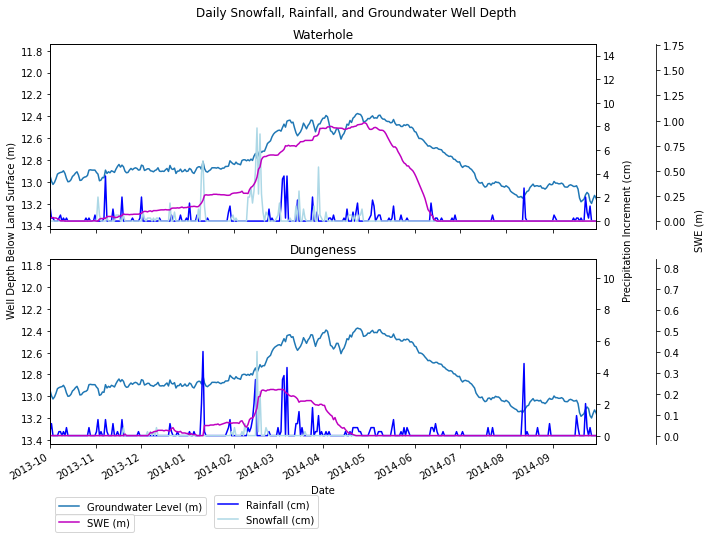

In [251]:
# Function to plot snowfall, rainfall, and groundwater well level 
def plotwater(df1, df2, dfgw, start_date, end_date): 
    
    fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize = (10,7.5))
    
    fig.suptitle('Daily Snowfall, Rainfall, and Groundwater Well Depth')
    ax2.set_xlabel('Date')
    ax.set_xlim(start_date, end_date)
    ax2.set_xlim(start_date, end_date)
    ax.set_title('Waterhole')
    ax2.set_title('Dungeness')
    
    ax.plot(dfgw.index, dfgw['Depth to Water Level (m)'], label = 'Groundwater Level (m)')
    ax.invert_yaxis()
    ax1 = ax.twinx()
    ax1.plot(df1['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax1.plot(df1['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax2.plot(dfgw.index, dfgw['Depth to Water Level (m)'], label = 'Groundwater Level (m)')

    ax3 = ax2.twinx()
    ax3.plot(df2['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax3.plot(df2['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax4 = ax.twinx()
    ax4.plot(df1['Snow Water Equivalent (m)'], color = 'm', label = 'SWE (m)')
    ax4.spines['right'].set_position(('outward', 60))
    
    ax5 = ax2.twinx()
    ax5.plot(df2['Snow Water Equivalent (m)'], color = 'm', label = 'SWE (m)')
    ax5.spines['right'].set_position(('outward', 60))
    
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax1.set_ylabel('Precipitation Increment (cm)')
    ax4.set_ylabel('SWE (m)')
    ax2.invert_yaxis()
    ax.yaxis.set_label_coords(-0.06,0)
    ax1.yaxis.set_label_coords(1.05,0)
    ax4.yaxis.set_label_coords(1.18,0)
    
    ax2.legend(loc = 'upper left', bbox_to_anchor = (0,-0.26))
    ax3.legend(loc = 'upper right', bbox_to_anchor = (0.5,-0.25))    
    ax5.legend(loc = 'upper left', bbox_to_anchor = (0, -0.35))
    fig.autofmt_xdate()
    fig.tight_layout(pad = 1)
    
# Run function for Waterhole and Dungeness full period of interest 
print('Full Period of Interest (2009 - 2021 WY)')
plotwater(dfwaterhole, dfdungeness, dfwell, startdate, enddate)
plt.show()

# Run function for max SWE year 
print('Year with Max SWE was Missing Significant Portion of Well Data so Year with 2nd Highest SWE was chosen (2012 WY)')
plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2011,10,1), datetime(2012,9,30))
plt.show()

# Run function for min SWE year 
print('Year with Min SWE (2015 WY)')
plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2014,10,1), datetime(2015,9,30))
plt.show()

# Run function for max GW year 
print('Year with Shallowest Well Depth from Surface (Greatest Depth) (2016 WY)')
plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2015,10,1), datetime(2016,9,30))
plt.show()

# Run function for min GW year 
print('Year with Deepest Well Depth from Surface (Shallowest Depth) (2016 WY)')
plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2013,10,1), datetime(2014,9,30))
plt.show()


In addition to the annual trends, major precipitation events were also considered. A snowmelt event and a rainfall event were selected for the period of record and a plot was produced for each storm duration to determine if events in the mountains can influence groundwater levels downslope. The duration of precipitation was calculated using a method from ESCI 895 Lab 9 Course Material. 
## <font color=red>IN PROGRESS -- Need to update snowfall calcs with SWE melt calcs instead</font>

In [258]:
# Function to plot snowfall, rainfall, and groundwater well level for individual storm periods 
def plotstorm(df, dfgw, site, start_date, end_date): 
    fig, ax = plt.subplots()
    ax.set_title(site + ': Daily Snowfall, Rainfall, and Groundwater Well Depth')
    ax.set_xlabel('Date')
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax.invert_yaxis()
    ax.plot(dfgw.index, dfgw['Depth to Water Level (m)'], label = 'Groundwater Level (m)')
    
    ax2 = ax.twinx()
    ax2.set_ylabel('Precipitation Increment (cm)')
    ax2.plot(df['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax2.plot(df['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax3 = ax.twinx()
    ax3.set_ylabel('SWE (m)')
    ax3.plot(df['Snow Water Equivalent (m)'], color = 'm', label = 'SWE (m)')
    ax3.spines['right'].set_position(('outward', 60))
    
    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right')
    ax3.legend(loc = 'upper left', bbox_to_anchor = (0,0.9))
    
    ax.set_xlim(start_date, end_date)
    fig.autofmt_xdate()
    
# Function to calculate snowfall / rainfall durations for individual storm periods 
def analyzestorm(df1, df2, precip_type, stormstart, stormend):    
    # Duration of precipitation /  water input in days 
    totalp = df1[stormstart:stormend]
    Pgreater = (totalp.loc[totalp[precip_type] > 0.5, precip_type])
    Pstart = Pgreater.index[0]
    Pend = Pgreater.index[-1]
    Pdur = Pend - Pstart
    Pdur.days
    Pdur_days = Pdur.days + ((Pdur.seconds)/86400) #days + seconds converted to days
    
    print('The duration of the', precip_type, ' event is', str(round(Pdur_days, 3)), 'days')
    
    df1t = df1.copy()
    df1t = df1t[stormstart:stormend]
    df1t['seconds'] = df1t.index.view('int64')/1e9
    precip_centroid = sum(df1t['seconds'] * df1t[precip_type]) / sum(df1t[precip_type])
    precip_centroid_DT = pd.Timestamp(precip_centroid, unit = 's')
    peakQ_time = df2.loc[stormstart:stormend, 'Depth to Water Level (m)'].idxmax()
    lag_time = peakQ_time - precip_centroid_DT 
    lag_time_dec = lag_time.days + (lag_time.seconds/86400)
    
    print('The precipitation centroid lag to peak well level is', round(lag_time_dec, 3), 'days')


## <font color=red>SECTION IN PROGRESS -- SWE MELT EVENTS NOT YET IDENTIFIED AND PLOTTED</font>

Waterhole 2021 Rainstorm
The duration of the Rainfall  event is 6.0 days
The precipitation centroid lag to peak well level is 18.261 days


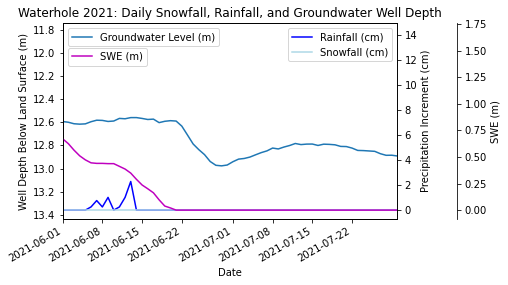

Dungeness 2021 Rainstorm
The duration of the Rainfall  event is 2.0 days
The precipitation centroid lag to peak well level is 8.294 days


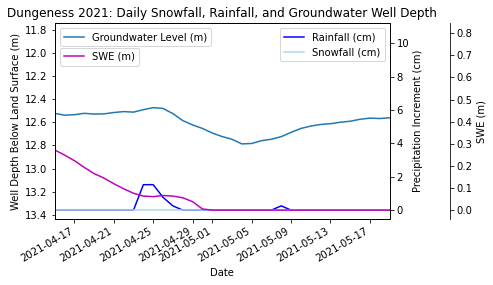

In [261]:
# Run plotstorm and analyzestorm functions for Waterhole Rainstorm 2021 
print('Waterhole 2021 Rainstorm')
analyzestorm(dfwaterhole, dfwell, 'Rainfall', datetime(2021,6,1), datetime(2021,7,30))
plotstorm(dfwaterhole, dfwell, 'Waterhole 2021', datetime(2021,6,1), datetime(2021,7,30))
plt.show()

# Run plotstorm and analyzestorm functions for Waterhole Snowstorm 2021 
# print('Waterhole 2021 Snowstorm')
# analyzestorm(dfwaterhole, dfwell, 'Snowfall', datetime(2021,2,28), datetime(2021,5,25))
# plotstorm(dfwaterhole, dfwell, 'Waterhole 2021', datetime(2021,2,28), datetime(2021,5,25))
# plt.show()

# Run plotstorm and analyzestorm functions for Dungeness Rainstorm 2021  
print('Dungeness 2021 Rainstorm')
analyzestorm(dfdungeness, dfwell, 'Rainfall', datetime(2021,4,15), datetime(2021,5,19))
plotstorm(dfdungeness, dfwell, 'Dungeness 2021', datetime(2021,4,15), datetime(2021,5,19))
plt.show()

# Run plotstorm and analyzestorm functions for Dungeness Snowstorm 2021 
# print('Dungeness 2021 Snowstorm -- No isolated snowfall peak available')
# analyzestorm(dfdungeness, dfwell, 'Snowfall', datetime(2021,1,15), datetime(2021,3,30))
# plotstorm(dfdungeness, dfwell, 'Dungeness 2021', datetime(2021,1,15), datetime(2021,3,30))
# plt.show()

# <font color=red>INSERT SUMMARY OF RESULTS AND CONCLUSION</font>

## References 
1. USDA Natural Resources Conservation Service, "Dungeness-Elwha Watershed: Rapid Watershed Assessment," USDA, 2006.
2. National Park Service, "Olympic National Park Washington," U.S. Department of the Interior, [Online]. Available: https://www.nps.gov/olym/learn/nature/naturalfeaturesandecosystems.htm. [Accessed November 2021].
3. Clallam County, "Clallam County Comprehensive Plan (Title 31 CCC)," Clallam County, WA, Port Angeles, 2021.
4. Clallam County Sherrif's Office Emergency Management Devision, "Hazard Mitigation Plan for Clallam County City of Forks City of Port Angeles City of Sequim Port of Port Angeles Peninsula College Olympic Medical Center Public Utility District," Clallam County Sheriff’s Office Emergency Management Division, Port Angeles, 2010.
5. "City of Sequim Jurisdiction-Specific Annex – Clallam County Hazard Mitigation Plan," City of Sequim, Sequim, 2019.
6. USDA, "Automated Snow Monitoring: Snow Telemetry (SNOTEL) Network," United States Department of Agriculture, [Online]. Available: https://www.nrcs.usda.gov/wps/portal/wcc/home/aboutUs/monitoringPrograms/automatedSnowMonitoring/. [Accessed November 2021].
7. National Park Service, "Olympic National Park Water Quality," US Department of the Interior, 7 September 2020. [Online]. Available: https://www.nps.gov/olym/learn/nature/waterquality.htm. [Accessed November 2021].
8. USGS, "Groundwater and Streamflow Information Program," United States Geological Survey, 24 February 2019. [Online]. Available: https://www.usgs.gov/water-resources/groundwater-and-streamflow-information/groundwater-monitoring?qt-science_support_page_related_con=0#qt-science_support_page_related_con. [Accessed November 2021].
9. B. E. Stamper, "THE FATE OF DINWOODY GLACIER: PRESENT STATE OF MASS BALANCE AND DOWNSTREAM IMPACTS OF GLACIER RUNOFF.," Colorado State University Master's Thesis, pp. 1-83, 2018. 
